In [1]:
import pandas as pd 
import matplotlib as plt

a3c_test = pd.read_csv('A3C_test.csv')
a3c_test
ppo_train = pd.read_csv('PPO_train.csv')
ppo_test = pd.read_csv('PPO_test.csv')


<AxesSubplot:xlabel='Time'>

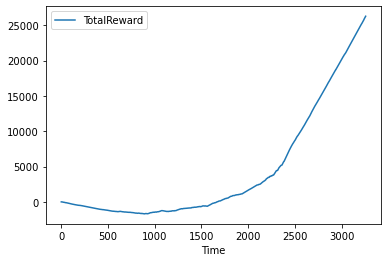

In [2]:

a3c_test.plot(x='Time',y='TotalReward')

<AxesSubplot:xlabel='Time'>

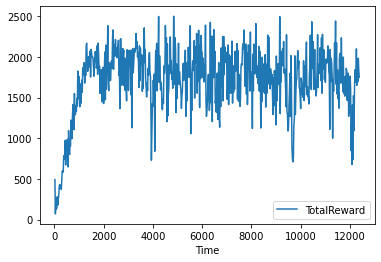

In [3]:
ppo_train.plot(x='Time',y='TotalReward')

<AxesSubplot:xlabel='Time'>

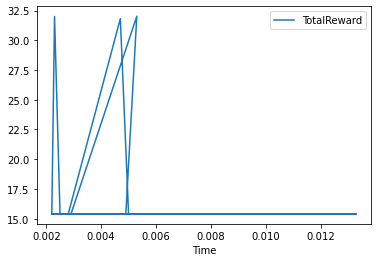

In [6]:
ppo_test.plot(x='Time',y='TotalReward')